# Проект: Исследование стартапов

## Введение

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.

Цель проекта - подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, с целью выявления показателей и признаков, которые указывают на повышенную вероятность успешной сделки по покупке компании.



## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [2]:
pip install phik

     |████████████████████████████████| 677 kB 2.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix


In [4]:
# Выгружаем данные датасетов
acquisition_df = pd.read_csv('/datasets/acquisition.csv')
company_df = pd.read_csv('/datasets/company_and_rounds.csv')
people_df = pd.read_csv('/datasets/people.csv')
education_df = pd.read_csv('/datasets/education.csv')
degrees_df = pd.read_csv('/datasets/degrees.csv')

# Выгружаем данные опциональных датасетов
fund_df = pd.read_csv('/datasets/fund.csv')
investment_df = pd.read_csv('/datasets/investment.csv')

Выведем все столбцы каждого датафрейма, проверим корректно ли приведены названия столбцов:

In [5]:
acquisition_df.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [6]:
company_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [7]:
# Приведём названия столбцов датафрейма company_df к стилю "snake_case", 
# а ткже заменим название повторяющегося столбца company_id на company_id_2

columns_snake_case = ['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round']

company_df.columns = columns_snake_case
company_df.columns 

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [8]:
people_df.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

In [9]:
education_df.columns

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

In [10]:
degrees_df.columns

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

Теперь выведем первые строки, а также общую информацию о каждом датафрейме:

In [11]:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [12]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


В датафрейме "acquisition_df" представлены данные объёмом 441.1 KB. Всего в датафрейме содержится 6 столбцов и 9407 строк, данные соответствуют описанию. Присутствуют пропуски в стлобцах: "term_code" и "acquired_at". Тип данных указан верно во всех столбцах, за исключением столбца "acquired_at".

In [13]:
company_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id_2         52928 non-null   float64
 15  funded_at        

В датафрейме "company_df" представлены данные объёмом 36.6 МB. Всего в датафрейме содержится 22 столбца и 217774 строки, данные соответствуют описанию. Во всех столбцах присутствуют пропуски. Тип данных указан неверно в столбцах: "founded_at", "closed_at", "funded_at". Кроме того, мы видим, что в датафрейме сожержится два столбца с одинаковым названием "company_id", однако значения в них разнятся, в связи с чем один из них переименован на "company_id_2".

In [15]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [16]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


В датафрейме "people_df" представлены данные объёмом 8.6 МB. Всего в датафрейме содержится 5 столбцов и 226709 строк, данные соответствуют описанию. Пропуски имеются в столбцах: "first_name", "last_name", "company_id", "network_username". Типы данных указаны верно.

In [17]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [18]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


В датафрейме "education_df" представлены данные объёмом 3.3 МB. Всего в датафрейме содержится 4 столбца и 109610 строк, данные соответствуют описанию. Пропуски имеются в столбцах: "instituition", "graduated_at". Тип данных указан неверно в столбце "graduated_at".

In [19]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [20]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


В датафрейме "degrees_df" представлены данные объёмом 3.3 МB. Всего в датафрейме содержится 4 столбца и 109610 строк, данные соответствуют описанию. Пропуски имеются в столбцах: "degree_type", "subject". Тип данных указан верно во всех столбцах.

### 1.2. Смена типов и анализ пропусков

Обработаем типы данных в столбцах, которые хранят значения даты и времени.


In [55]:
# Изменим тип данных в столбцe "acquired_at" датафрерйма acquisition_df:
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], errors='coerce')
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             9407 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [56]:
# Изменим типы данных в столбцах: "founded_at", "closed_at", "funded_at" датафрема company_df: 
company_df[['founded_at', 'closed_at','funded_at']] = company_df[['founded_at', 'closed_at','funded_at']].apply(pd.to_datetime, errors='coerce')
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217774 non-null  float64       
 1   name                 217774 non-null  object        
 2   category_code        217774 non-null  object        
 3   status               217774 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               217774 non-null  object        
 7   network_username     217774 non-null  object        
 8   country_code         217774 non-null  object        
 9   investment_rounds    217774 non-null  float64       
 10  funding_rounds       217774 non-null  float64       
 11  funding_total        217774 non-null  float64       
 12  milestones           217774 non-null  float64       
 13  funding_round_

Проанализируем количество пропусков в датафреймах:

In [23]:
acquisition_df.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [24]:
acquisition_df.isna().mean()

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

В ходе изучения данных с пропущенными значениями в датафрейме acquisition_df установлено,что пропуски имеются в следующих столбцах:

* "term_code" - 7576 пропусков или 0.8 % от общего количества значений;
* "acquired_at" - 29 пропусков или 0.003 % от общего количества значений. 

Можно предположить, что наличие пропущенных значений в указанных столбцах может быть связано с тем, что иформация о варианте расчёта и дате сделки не была добавлена в базу данных. Пропуски в столбце: "term_code" заменим на строку индикатор "нет данных", а в столбце с числовыми данными "acquired_at" на индикатор -1.

In [25]:
# Заменим пропуски в столбце term_code на строку-индикатор "нет данных", 
# а в столбце acquired_at на индикатор -1

acquisition_df['term_code'] = acquisition_df['term_code'].fillna("нет данных")
acquisition_df ['acquired_at'] = acquisition_df ['acquired_at'].fillna(-1)

acquisition_df[['term_code', 'acquired_at']]

,term_code,acquired_at
0,нет данных,2007-05-30 00:00:00
1,cash,2007-07-01 00:00:00
2,cash,2007-05-01 00:00:00
3,cash,2007-06-01 00:00:00
4,cash,2007-07-01 00:00:00
...,...,...
9402,stock,2013-12-11 00:00:00
9403,нет данных,2013-12-09 00:00:00
9404,нет данных,2007-07-03 00:00:00
9405,cash,2013-12-12 00:00:00


In [26]:
company_df.isna().sum() 

company_id                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_2           164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [27]:
company_df.isna().mean()

company_id             0.001387
name                   0.001387
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
company_id_2           0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
dtype: float64

В ходе изучения данных с пропущенными значениями в датафрейме company_df установлено, что пропуски имеются всех столбцах:

* "company_id" - 302 пропуска или 0.001 % от общего количества значений;
* "name" - 302 пропуска или 0.001 % от общего количества значений; 
* "category_code" - 73888 пропусков или 0.34 % от общего количества значений;     
* "status" - 302 пропуска или 0.001 % от общего количества значений;                   
* "founded_at" - 107818  пропусков или    0.5 % от общего количества значений;
* "closed_at" - 214325  пропусков  или 1 % от общего количества значений;
* "domain" - 70615   пропусков или 0.32 % от общего количества значений;
* "network_username" - 122240 пропусков  или  0.6 % от общего количества значений;
* "country_code" - 109167 пропусков  или 0.5 % от общего количества значений;
* "investment_rounds" - 302   пропуска или   0.001 % от общего количества значений;
* "funding_rounds" - 302 пропуска или   0.001 % от общего количества значений;
* "funding_total" - 302 пропуска или   0.001 % от общего количества значений;
* "milestones" - 302 пропуска или   0.001 % от общего количества значений;
* "funding_round_id" - 164846 пропусков или 0.8 % от общего количества значений;
* "company_id_2" - 164846 пропусков или 0.8 % от общего количества значений;
* "funded_at" - 165094  пропуска или 0.8 % от общего количества значений;
* "funding_round_type" - 164846 пропусков или 0.8 % от общего количества значений ;
* "raised_amount" - 164846 пропусков или 0.8  % от общего количества значений;
* "pre_money_valuation" - 164846 пропусков или 0.8 % от общего количества значений;
* "participants" - 164846 пропусков или 0.8 % от общего количества значений;
* "is_first_round" - 164846 пропусков или 0.8 % от общего количества значений;
* "is_last_round" - 164846 пропусков или 0.8 % от общего количества значений.

Пропуски в числовых столбцах, а атакже в столбцах с датой и временем: "company_id", "founded_at", "closed_at", "investment_rounds", "funding_rounds", "funding_total", "milestones", "funding_round_id", "company_id_2", "funded_at", "raised_amount", "pre_money_valuation", "participants", "is_first_round", "is_last_round" заменим на индикатор -1, а в строковых столбцах: "name","category_code", "status", "domain", "network_username", "country_code", "funding_round_type" - на строку индикатор "нет данных".  

In [28]:
# Заменим пропуски в столбцах "name","category_code", "status", 
# "domain", "network_username", "country_code", "funding_round_type" на строку-индикатор "нет данных", 
# а в столбцах "company_id", "founded_at", "closed_at", 
# "investment_rounds", "funding_rounds", "funding_total", "milestones", 
# "funding_round_id", "company_id_2", "funded_at", "raised_amount", "pre_money_valuation", 
# "participants", "is_first_round", "is_last_round" на индикатор -1:

company_df[["name","category_code", "status", 
"domain", "network_username", "country_code", "funding_round_type"]] = company_df[["name","category_code", "status", 
"domain", "network_username", "country_code", "funding_round_type"]].fillna("нет данных")
company_df [["company_id", "founded_at", "closed_at", 
"investment_rounds", "funding_rounds", "funding_total", "milestones", 
"funding_round_id", "company_id_2", "funded_at", "raised_amount", "pre_money_valuation", 
"participants", "is_first_round", "is_last_round"]] = company_df [["company_id", "founded_at", "closed_at", 
"investment_rounds", "funding_rounds", "funding_total", "milestones", 
"funding_round_id", "company_id_2", "funded_at", "raised_amount", "pre_money_valuation", 
"participants", "is_first_round", "is_last_round"]].fillna(-1)

company_df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17 00:00:00,-1,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01 00:00:00,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17 00:00:00,-1,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01 00:00:00,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17 00:00:00,-1,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19 00:00:00,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,-1,-1,flektor.com,нет данных,USA,0.0,...,0.0,-1.0,-1.0,-1,нет данных,-1.0,-1.0,-1.0,-1.0,-1.0
4,100.0,There,games_video,acquired,-1,-1,there.com,нет данных,USA,0.0,...,4.0,-1.0,-1.0,-1,нет данных,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,-1.0,нет данных,нет данных,нет данных,-1,-1,нет данных,нет данных,нет данных,-1.0,...,-1.0,56454.0,282847.0,2011-01-31 00:00:00,other,5500000.0,0.0,0.0,1.0,1.0
217770,-1.0,нет данных,нет данных,нет данных,-1,-1,нет данных,нет данных,нет данных,-1.0,...,-1.0,56542.0,55477.0,2011-01-13 00:00:00,venture,10633300.0,0.0,0.0,0.0,1.0
217771,-1.0,нет данных,нет данных,нет данных,-1,-1,нет данных,нет данных,нет данных,-1.0,...,-1.0,56543.0,55477.0,2012-05-31 00:00:00,venture,2125720.0,0.0,0.0,1.0,0.0
217772,-1.0,нет данных,нет данных,нет данных,-1,-1,нет данных,нет данных,нет данных,-1.0,...,-1.0,56928.0,283492.0,2013-12-03 00:00:00,venture,3602480.0,0.0,5.0,1.0,1.0


In [29]:
people_df.isna().sum() 

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [30]:
people_df.isna().mean()

id                  0.000000
first_name          0.000022
last_name           0.000004
company_id          0.847315
network_username    0.828560
dtype: float64

В ходе изучения данных с пропущенными значениями в датафрейме people_df установлено, что пропуски имеются в столбцах:

* "first_name" - 5 пропусков или 0.000022 % от общего количества значений;
* "last_name" - 1 пропуска или 0.000004 % от общего количества значений; 
* "company_id" - 192094 пропуска или 0.84 % от общего количества значений;     
* "network_username" - 187842 пропуска или 0.82 % от общего количества значений.                   

Пропуски в числовом столбце "company_id" заменим на индикатор -1, а в строковых столбцах: "first_name","last_name",  "network_username" на строку индикатор "нет данных".  

In [57]:
# Заменим пропуски в столбцах "first_name","last_name", "network_username" на строку-индикатор "нет данных", 
# а в столбце "company_id"на индикатор -1:

people_df[["first_name","last_name", "network_username"]] = people_df[["first_name",
                                                                       "last_name", "network_username"]].fillna("нет данных")
people_df["company_id"] = people_df["company_id"].fillna(-1)

people_df[["first_name","last_name", "company_id","network_username"]]

,first_name,last_name,company_id,network_username
0,mark,zuckerberg,5.0,нет данных
1,peter,lester,27.0,нет данных
2,dr. steven,e. saunders,292.0,нет данных
3,neil,capel,2526.0,нет данных
4,sue,pilsch,-1.0,нет данных
...,...,...,...,...
226704,ramon,peypoch,-1.0,нет данных
226705,dr. ray,woods,188200.0,network
226706,ricardo,durand,143419.0,itechsocialnet
226707,mahesh,kumar,-1.0,socialnethubs


In [32]:
education_df.isna().sum()

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [33]:
education_df.isna().mean()

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

В ходе изучения данных с пропущенными значениями в датафрейме education_df установлено, что пропуски имеются в столбцах:

* "instituition" - 55 пропусков или 0.0005 % от общего количества значений;
* "graduated_at" - 51556 пропусков или 0.5 % от общего количества значений.

Пропуски в столбце с датой и временем "graduated_at" заменим на индикатор -1, а в столбце "instituition" на строку индикатор "нет данных".  

In [58]:
# Заменим пропуски в столбце "instituition" на строку-индикатор "нет данных", 
# а в столбце "graduated_at" на индикатор -1:

education_df["instituition"] = education_df["instituition"].fillna("нет данных")
education_df["graduated_at"] = education_df["graduated_at"].fillna(-1)

education_df[["instituition","graduated_at"]]

,instituition,graduated_at
0,нет данных,-1
1,"washington university, st. louis",1990-01-01
2,boston university,1992-01-01
3,university of greenwich,2006-01-01
4,rice university,-1
...,...,...
109605,american institute of certtified public accoun...,-1
109606,south china university of technology,-1
109607,clarkson university,-1
109608,colorado state university,-1


In [35]:
degrees_df.isna().sum() 

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [36]:
degrees_df.isna().mean()

id             0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64

В ходе изучения данных с пропущенными значениями в датафрейме degrees_df установлено, что пропуски имеются в столбцах:

* "degree_type" - 11218 пропусков или 0.1 % от общего количества значений;
* "subject" - 28312 пропуска или 0.3 % от общего количества значений.

Пропуски в указанных столбцах заменим на строку индикатор "нет данных".  

In [59]:
# Заменим пропуски в столбце "degree_type" и  "subject" на строку-индикатор "нет данных":

degrees_df[["degree_type", "subject"]] = degrees_df[["degree_type", "subject"]].fillna("нет данных")

degrees_df[["degree_type", "subject"]]

,degree_type,subject
0,mba,нет данных
1,ba,"english, french"
2,ms,mass communication
3,ms,internet technology
4,bcs,"computer science, psychology"
...,...,...
109605,cpa,нет данных
109606,ms & bs,engineering
109607,phd,engineering
109608,b.s.,electrical engineering


Проверим данные на наличие дубликатов, для этого приведём значения столбцов, содержащих строки к идиному регистру и уберём лишние пробелы. 

In [60]:
acquisition_df['term_code'] = acquisition_df['term_code'].str.lower()
acquisition_df['term_code'] = acquisition_df['term_code'].str.strip()

acquisition_df['term_code']

0       нет данных
1             cash
2             cash
3             cash
4             cash
           ...    
9402         stock
9403    нет данных
9404    нет данных
9405          cash
9406    нет данных
Name: term_code, Length: 9407, dtype: object

In [61]:
company_df['name']= company_df['name'].str.lower()
company_df['category_code']= company_df['category_code'].str.lower()
company_df['status']= company_df['status'].str.lower()           
company_df['domain']= company_df['domain'].str.lower()
company_df['network_username']= company_df['network_username'].str.lower()    
company_df['country_code']= company_df['country_code'].str.lower()    
company_df['funding_round_type']= company_df['funding_round_type'].str.lower()    

company_df['name']= company_df['name'].str.strip()
company_df['category_code']= company_df['category_code'].str.strip()
company_df['status']= company_df['status'].str.strip()           
company_df['domain']= company_df['domain'].str.strip()
company_df['network_username']= company_df['network_username'].str.strip()    
company_df['country_code']= company_df['country_code'].str.strip()    
company_df['funding_round_type']= company_df['funding_round_type'].str.strip()   
company_df[['name', 'category_code', 'status', 'domain', 
            'network_username', 'country_code', 'funding_round_type']]

,name,category_code,status,domain,network_username,country_code,funding_round_type
0,wetpaint,web,operating,wetpaint-inc.com,bachelrwetpaint,usa,series-a
1,wetpaint,web,operating,wetpaint-inc.com,bachelrwetpaint,usa,series-b
2,wetpaint,web,operating,wetpaint-inc.com,bachelrwetpaint,usa,series-c+
3,flektor,games_video,acquired,flektor.com,нет данных,usa,нет данных
4,there,games_video,acquired,there.com,нет данных,usa,нет данных
...,...,...,...,...,...,...,...
217769,нет данных,нет данных,нет данных,нет данных,нет данных,нет данных,other
217770,нет данных,нет данных,нет данных,нет данных,нет данных,нет данных,venture
217771,нет данных,нет данных,нет данных,нет данных,нет данных,нет данных,venture
217772,нет данных,нет данных,нет данных,нет данных,нет данных,нет данных,venture


In [62]:
columns_lower = ['first_name','last_name', 'network_username']
for column in columns_lower:
    people_df[column] = people_df[column].str.lower()
    people_df[column] = people_df[column].str.strip()
    
people_df[['first_name','last_name', 'network_username']]

,first_name,last_name,network_username
0,mark,zuckerberg,нет данных
1,peter,lester,нет данных
2,dr. steven,e. saunders,нет данных
3,neil,capel,нет данных
4,sue,pilsch,нет данных
...,...,...,...
226704,ramon,peypoch,нет данных
226705,dr. ray,woods,network
226706,ricardo,durand,itechsocialnet
226707,mahesh,kumar,socialnethubs


In [41]:
education_df['instituition'] = education_df['instituition'].str.lower()
education_df['instituition'] = education_df['instituition'].str.strip()
education_df['instituition'] 

0                                                нет данных
1                          washington university, st. louis
2                                         boston university
3                                   university of greenwich
4                                           rice university
                                ...                        
109605    american institute of certtified public accoun...
109606                 south china university of technology
109607                                  clarkson university
109608                            colorado state university
109609                university of san diego school of law
Name: instituition, Length: 109610, dtype: object

In [42]:
columns_lower = ['object_id','degree_type', 'subject']
for column in columns_lower:
    degrees_df[column] = degrees_df[column].str.lower()
    degrees_df[column] = degrees_df[column].str.strip()
degrees_df[['object_id','degree_type', 'subject']]

,object_id,degree_type,subject
0,p:6117,mba,нет данных
1,p:6136,ba,"english, french"
2,p:6136,ms,mass communication
3,p:6005,ms,internet technology
4,p:5832,bcs,"computer science, psychology"
...,...,...,...
109605,p:268589,cpa,нет данных
109606,p:268527,ms & bs,engineering
109607,p:268527,phd,engineering
109608,p:268528,b.s.,electrical engineering


In [43]:
# Выведем количество уникальных значений в столбцах датафрейма acquisition_df:
acquisition_df.nunique()

id                      9407
acquiring_company_id    4793
acquired_company_id     9264
term_code                  4
price_amount            1037
acquired_at             2628
dtype: int64

In [44]:
# Выведем количество уникальных значений в столбцах датафрейма company_df:
company_df.nunique()

company_id             196554
name                   196505
category_code              43
status                      5
founded_at               6157
closed_at                 926
domain                 125499
network_username        79375
country_code              176
investment_rounds          43
funding_rounds             17
funding_total            9484
milestones                 11
funding_round_id        52929
company_id_2            31940
funded_at                3400
funding_round_type         10
raised_amount           10267
pre_money_valuation        28
participants               33
is_first_round              3
is_last_round               3
dtype: int64

In [45]:
# Выведем количество уникальных значений в столбцах датафрейма people_df:
people_df.nunique()

id                  226708
first_name           26719
last_name           105540
company_id           22923
network_username     38385
dtype: int64

In [46]:
# Выведем количество уникальных значений в столбцах датафрейма education_df:
education_df.nunique()

id              109610
person_id        68451
instituition     20532
graduated_at        72
dtype: int64

In [47]:
# Выведем количество уникальных значений в столбцах датафрейма degrees_df:
degrees_df.nunique()

id             109610
object_id       68451
degree_type      6744
subject         19183
dtype: int64

In [48]:
# Проверим даныне датафрейма acquisition_df на наличие дубликатов:
acquisition_df.duplicated().sum()

0

In [49]:
# Проверим даныне датафрейма company_df на наличие дубликатов:
company_df.duplicated().sum()

0

In [50]:
# Проверим даныне датафрейма people_df на наличие дубликатов:
people_df.duplicated().sum()

0

In [51]:
# Проверим даныне датафрейма education_df на наличие дубликатов:
education_df.duplicated().sum()

0

In [52]:
# Проверим даныне датафрейма degrees_df на наличие дубликатов:
degrees_df.duplicated().sum()

0

В ходе предобработки данных мы ознакомились с данными в датафреймах, привели названия столбцов к стилю snake_case, заменили названия повторяющихся столбцов и пропуски в данных, а также проверили их на наличие дубликатов. Приступим к исследованию. 

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

- Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.


In [63]:
# Составим сводную таблицу при помощи группировки по столбцу funded_at: 
pivot_table = company_df.groupby(company_df['funded_at'].dt.year).agg({ 
    'raised_amount': 'median', 
    'funding_rounds': 'count' })

pivot_table[pivot_table['funding_rounds'] > 50].head(15)


,raised_amount,funding_rounds
funded_at,,
1999.0,2000000.0,76
2000.0,4200000.0,125
2001.0,3000000.0,96
2002.0,4200000.0,116
2003.0,3000000.0,159
2004.0,5000000.0,291
2005.0,5500000.0,1633
2006.0,5000000.0,2436
2007.0,3973320.0,3279


<Figure size 720x432 with 0 Axes>

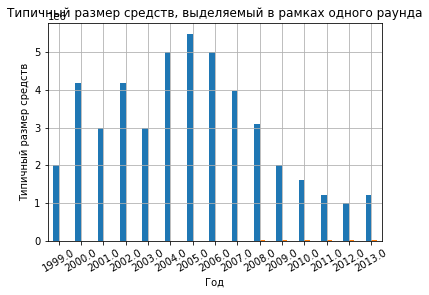

In [64]:
# На основе полученных данных построим столючатую диаграмму:
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
pivot_table[pivot_table['funding_rounds'] > 50].head(15).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=30, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Типичный размер средств, выделяемый в рамках одного раунда'
)

# Настраиваем оформление графика
plt.xlabel('Год')
plt.ylabel('Типичный размер средств')
plt.grid()
# Выводим график
plt.show() 

Проанализировав полученные данные, можно сказать что типичный размер собранных в рамках одного раунда средств был максимален в 2005 году и составлял 5 500 000. В 2013 году количество раундов финансирования было самым большим и составило 11072.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп. 

In [65]:
# Объединим датафреймы people_df, education_df и degrees_df с пмощью метода pd.concat(), 
# а затем разделим все компании на несколько групп по количеству сотрудников:
people_education = education_df.merge(degrees_df, on='id', how = 'left')
people_education['people_group'] = pd.cut(people_education['id'], bins = [0, 1, 2, 3, 5, 10, 25, float('inf')],
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+'])

people_education



,id,person_id,instituition,graduated_at,object_id,degree_type,subject,people_group
0,1,6117,нет данных,-1,p:6117,mba,нет данных,1
1,2,6136,"washington university, st. louis",1990-01-01,p:6136,ba,"english, french",2
2,3,6136,boston university,1992-01-01,p:6136,ms,mass communication,3
3,4,6005,university of greenwich,2006-01-01,p:6005,ms,internet technology,4-5
4,5,5832,rice university,-1,p:5832,bcs,"computer science, psychology",4-5
...,...,...,...,...,...,...,...,...
109605,109606,268589,american institute of certtified public accoun...,-1,p:268589,cpa,нет данных,26+
109606,109607,268527,south china university of technology,-1,p:268527,ms & bs,engineering,26+
109607,109608,268527,clarkson university,-1,p:268527,phd,engineering,26+
109608,109609,268528,colorado state university,-1,p:268528,b.s.,electrical engineering,26+


In [66]:
""" Функция проверяет столбец "instituition" и в случае, 
    если значение столбца строка-индикатор "нет данных",
    возвращает 1, в остальных случаях результат будет 0"""

def education_info(instituition):
    if instituition == "нет данных":
        return 1
    else:
        return 0

# Создадим новый столбец education_info, значением которого будет результат функции: 
people_education['education_info'] = people_education['instituition'].apply(education_info)
people_education


,id,person_id,instituition,graduated_at,object_id,degree_type,subject,people_group,education_info
0,1,6117,нет данных,-1,p:6117,mba,нет данных,1,1
1,2,6136,"washington university, st. louis",1990-01-01,p:6136,ba,"english, french",2,0
2,3,6136,boston university,1992-01-01,p:6136,ms,mass communication,3,0
3,4,6005,university of greenwich,2006-01-01,p:6005,ms,internet technology,4-5,0
4,5,5832,rice university,-1,p:5832,bcs,"computer science, psychology",4-5,0
...,...,...,...,...,...,...,...,...,...
109605,109606,268589,american institute of certtified public accoun...,-1,p:268589,cpa,нет данных,26+,0
109606,109607,268527,south china university of technology,-1,p:268527,ms & bs,engineering,26+,0
109607,109608,268527,clarkson university,-1,p:268527,phd,engineering,26+,0
109608,109609,268528,colorado state university,-1,p:268528,b.s.,electrical engineering,26+,0


In [67]:
# Вычислим среднюю долю сотрудников без информации об образовании:
avg_share = people_education.groupby('people_group')['education_info'].mean().sort_values(ascending=False)

avg_share

people_group
1        1.000000
26+      0.000493
2        0.000000
3        0.000000
4-5      0.000000
6-10     0.000000
11-25    0.000000
Name: education_info, dtype: float64

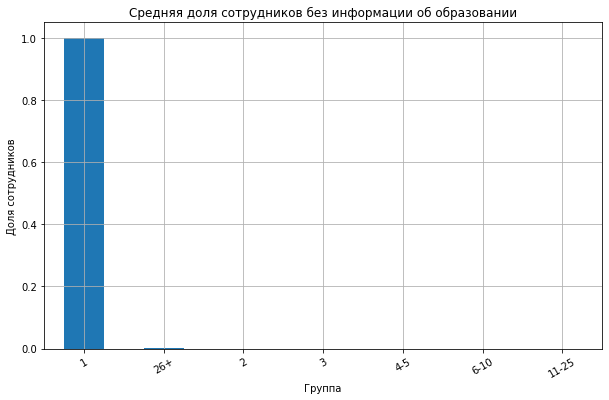

In [68]:
# На основе полученных данных построим столбчатую диаграмму:
plt.figure(figsize=(10, 6))

avg_share.plot(
               kind='bar', 
               rot=30, 
               legend=False,
               title=f'Средняя доля сотрудников без информации об образовании')
plt.xlabel('Группа')
plt.ylabel('Доля сотрудников')
plt.grid()

plt.show() 

Мы разделили все компании на несколько групп по количеству сотрудников - "1" (1 сотрудник), "2" (от 1 до 2 сотрудников), "3" (от 2 до 3 сотрудников), "4-5" (от 4 до 5 сотрудников), "6-10" (от 6 до 10 сотрудников), "11-25" (от 11 до 25 сотрудников), а также "26+" (компании, в которых более 26 сотрудников),  затем посчитали среднюю долю сотрудников без информации об образовании. В итоге мы узнали, что в компаниях, где работает всего один сотрудник, 100 % не имеют информации об образовании, в компаниях, где  более 26 сотрудников - 0.000493 %, в остальных группах компаний сотрудники, у которых нет информации об образовании, отсутсвуют. 

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

Как мы помним, в датафрейме company_df 217774 строки, а в people_df - 226709. При этом в столбце "network_username" датафрейма company_df 79375 уникальных значений, а в аналогичном столбце датафрейма people_df - 38385 уникальных значений. Разница в сумме строк датасета и уникальных значений в столбце "network_username" обоих датафреймов может быть связана с большим количеством пропусков. Чтобы проверить дублируется ли для разных датасетов информация в столбцах с таким названием, объединим датасеты company_df и people_df, а после этого итоговую таблицу проверим на наличие дубликатов.

In [69]:
company_and_people_df = pd.concat([company_df,people_df])
company_and_people_df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,id,first_name,last_name
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,...,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,NaN,NaN,NaN
1,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,...,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,NaN,NaN,NaN
2,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,...,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,NaN,NaN,NaN
3,10.0,flektor,games_video,acquired,NaT,NaT,flektor.com,нет данных,usa,0.0,...,NaT,нет данных,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN
4,100.0,there,games_video,acquired,NaT,NaT,there.com,нет данных,usa,0.0,...,NaT,нет данных,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226704,-1.0,NaN,NaN,NaN,NaT,NaT,NaN,нет данных,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,99999.0,ramon,peypoch
226705,188200.0,NaN,NaN,NaN,NaT,NaT,NaN,network,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,174088.0,dr. ray,woods
226706,143419.0,NaN,NaN,NaN,NaT,NaT,NaN,itechsocialnet,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,118386.0,ricardo,durand
226707,-1.0,NaN,NaN,NaN,NaT,NaT,NaN,socialnethubs,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,175827.0,mahesh,kumar


In [70]:
company_and_people_df.duplicated().sum()

0

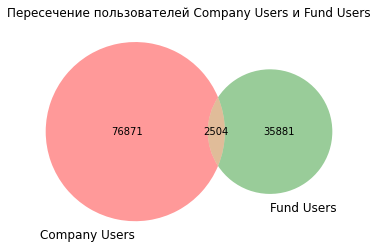

In [71]:
!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3 #(venn3 - Это если сразу три кругляшка построить)
import matplotlib.pyplot as plt


# Строим диаграмму Венна
venn2([set(company_df['network_username']), set(people_df['network_username'])], set_labels=('Company Users', 'Fund Users'))

# Отображаем график
plt.title("Пересечение пользователей Company Users и Fund Users")
plt.show()  

Мы объединили датасеты company_df и people_df, проверили получившийся датафрейм на наличие дубликатов. Помимо этого добавили диаграмму Венна для того, чтобы наглядно оценить количество совпадений в столбце network_username из датафреймов company_df и people_df. В итоге получили 2504 совпадений, что не так много, если учитывать общее количество значений в указанном столбце.  



### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

Приведём данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. 

Подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

В датасете company_and_rounds.csv представлены данные объёмом 36.6 МB. Всего в датафрейме содержится 22 столбца и 217774 строки, данные соответствуют описанию. Во всех столбцах присутствуют пропуски, в ходе предобработки они были заменены на строки-индикаторы и числа-идикаторы. Тип данных указан неверно в столбцах: "founded_at", "closed_at", "funded_at", в связи с чем заменен на тип datetime64[ns]. Кроме того, в датафрейме сожержится два столбца с одинаковым названием "company_id", однако значения в них разнятся, в связи с чем один из них переименован на "company_id_2".

In [72]:
# Создадим небольшую таблицу, в которой расчитаем для каждой компании сумму финансирования и раундов:  

company_sum = company_df.groupby('company_id').agg(
    name=('name', 'first'),
    amount=('raised_amount', 'sum'),
    rounds=('funding_round_id', 'count')
).sort_values( by = 'amount', ascending = False)

company_sum

,name,amount,rounds
company_id,,,
-1.0,нет данных,7.575084e+09,302
13219.0,clearwire,5.700000e+09,4
4843.0,"verizon communications, inc.",3.985050e+09,2
242735.0,sigmacare,2.600000e+09,1
5.0,socialnet,2.425700e+09,11
...,...,...,...
153113.0,volgastroy,-1.000000e+00,1
153115.0,enterrprise auto transport,-1.000000e+00,1
153116.0,2muse,-1.000000e+00,1


In [73]:
# Разделим датафрейм company_df на две меньшие таблицы, в одной из которых бужет информауция о компании, в другой о раундах:
columns_for_df1 = ['company_id', 'name', 'category_code', 'status', 'founded_at',
                   'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones']
columns_for_df2 = ['company_id', 'raised_amount', 'funding_round_id', 
                            'funded_at', 'funding_round_type', 'pre_money_valuation', 
                            'participants', 'is_first_round', 
                            'is_last_round']
company_info_df = company_df[columns_for_df1]
round_info_df= company_df[columns_for_df2]

company_info_df=company_info_df.drop_duplicates(subset=['company_id', 'name', 'category_code', 'status', 'founded_at',
                   'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones'], keep='first')

#смоторим пропуски
display(round_info_df[round_info_df['funding_round_type'].isna()].head()) 

#убираем пропуски по колонке
round_info_df=round_info_df.dropna(subset=['funding_round_type'])

,company_id,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round


In [74]:
company_info_df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,3.0,39750000.0,5.0
3,10.0,flektor,games_video,acquired,NaT,NaT,flektor.com,нет данных,usa,0.0,0.0,0.0,0.0
4,100.0,there,games_video,acquired,NaT,NaT,there.com,нет данных,usa,0.0,0.0,0.0,4.0
5,10000.0,mywebbo,network_hosting,operating,2008-07-26,NaT,mywebbo.com,нет данных,нет данных,0.0,0.0,0.0,0.0
6,10001.0,the movie streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,нет данных,нет данных,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217463,3429.0,zend technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,usa,0.0,4.0,44000000.0,6.0
217467,7748.0,flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,usa,0.0,1.0,1300000.0,3.0
217468,174536.0,pphotonet,games_video,operating,2012-05-01,NaT,pphotonet.co,pphotonet,нет данных,0.0,0.0,0.0,0.0
217469,43233.0,photonet,photo_video,acquired,2010-03-01,NaT,photonet.com,photonet,usa,0.0,3.0,57500000.0,3.0


In [75]:
round_info_df

,company_id,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,5250000.0,888.0,2005-10-01,series-a,0.0,2.0,0.0,1.0
1,1.0,9500000.0,889.0,2007-01-01,series-b,0.0,3.0,0.0,0.0
2,1.0,25000000.0,2312.0,2008-05-19,series-c+,0.0,4.0,1.0,0.0
3,10.0,-1.0,-1.0,NaT,нет данных,-1.0,-1.0,-1.0,-1.0
4,100.0,-1.0,-1.0,NaT,нет данных,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...
217769,-1.0,5500000.0,56454.0,2011-01-31,other,0.0,0.0,1.0,1.0
217770,-1.0,10633300.0,56542.0,2011-01-13,venture,0.0,0.0,0.0,1.0
217771,-1.0,2125720.0,56543.0,2012-05-31,venture,0.0,0.0,1.0,0.0
217772,-1.0,3602480.0,56928.0,2013-12-03,venture,0.0,5.0,1.0,1.0



## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.


In [76]:
# Отфильтруем таблицу company_info_df и оставим компани, соответствующие условиям заказчика:
df_filtered_company = company_info_df[(company_info_df['funding_rounds'] > 0) | 
                                 (company_info_df['investment_rounds'] > 0) | (company_info_df['status'] == 'acquired')]
df_filtered_company

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,3.0,39750000.0,5.0
3,10.0,flektor,games_video,acquired,NaT,NaT,flektor.com,нет данных,usa,0.0,0.0,0.0,0.0
4,100.0,there,games_video,acquired,NaT,NaT,there.com,нет данных,usa,0.0,0.0,0.0,4.0
15,1001.0,friendfeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,usa,0.0,1.0,5000000.0,3.0
20,10014.0,mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,usa,0.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217458,1344.0,vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,usa,0.0,1.0,10000000.0,0.0
217459,142181.0,stop being watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,sbwinfonetwork,usa,0.0,1.0,500000.0,1.0
217463,3429.0,zend technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,usa,0.0,4.0,44000000.0,6.0
217467,7748.0,flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,usa,0.0,1.0,1300000.0,3.0



### 3.2. Анализ выбросов


In [77]:
# Проверим статистические показатели столбца funding_total
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_filtered_company['funding_total'].describe()

count        40747.00
mean      10135609.64
std       56464359.98
min              0.00
25%              0.00
50%         600000.00
75%        5650650.00
max     5700000000.00
Name: funding_total, dtype: float64

Данные столбца "funding_total" имеют ненормальное распределение, так как среднее и медианное значения очень далеко расположены друг от друга, тоже можно сказать и об отличии стандартного отклонения - 56464359.98 при среднем 10135609.64, из этого следует, что у данных будет широкий разброс, о том же свидетельствует и колоссальная разница между третьим квартилем и максимальным значением. 

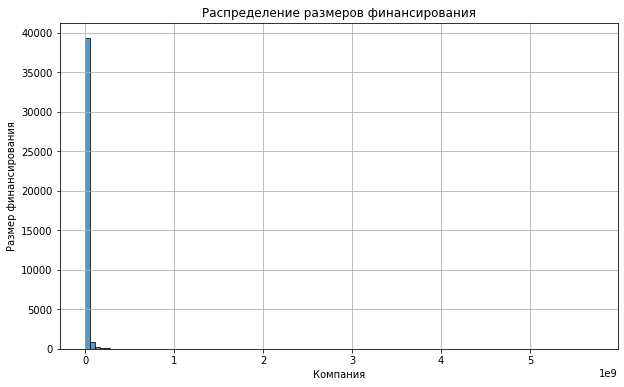

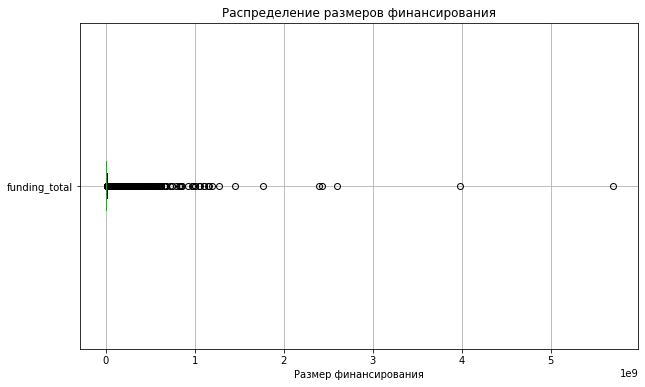

In [78]:
# Отразим распределение значений столбца funding_total на гистограмме распределения и диаграмме размаха
plt.figure(figsize=(10, 6))

pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_filtered_company['funding_total'].sort_values (ascending=False).plot(
                kind='hist', 
                bins=100, 
                alpha=0.75,
                edgecolor='black',
                rot=0
)

plt.title('Распределение размеров финансирования')
plt.xlabel('Компания')
plt.ylabel('Размер финансирования')

plt.grid()

plt.show()

plt.figure(figsize=(10, 6))


df_filtered_company.boxplot(column='funding_total', vert=False)

plt.title('Распределение размеров финансирования')
plt.xlabel('Размер финансирования')

plt.show()


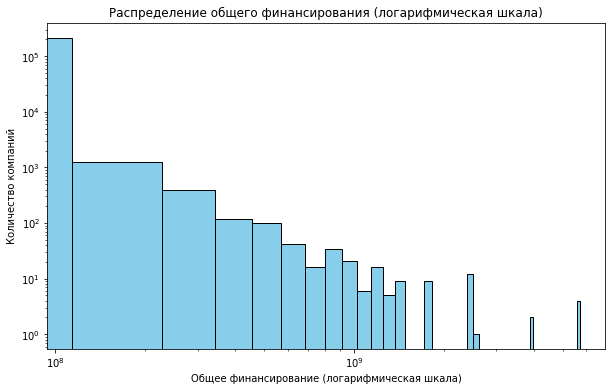

In [79]:
plt.figure(figsize=(10, 6))
plt.hist(company_df['funding_total'], bins=50, color='skyblue', edgecolor='black', log=True)
plt.xscale('log')  # Логарифмическая шкала по оси X
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')
plt.show()

Распределение данных действительно выглядит ассиметричным, а также характеризуется широким разбросом и «хвостом»  в правой части гистограммы. Такие высокие значения можно отнести к выбросам. Однако большинство максимальных значений могут не быть ошибочными, так как возможно связаны с высокой ценой продаваемых компаний.


### 3.3. Куплены забесплатно?

- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total`.

In [81]:
# Расчитаем верхнюю и нижнюю границы выбросов
Q1 = df_filtered_company['funding_total'].quantile(0.25)
Q3 = df_filtered_company['funding_total'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR


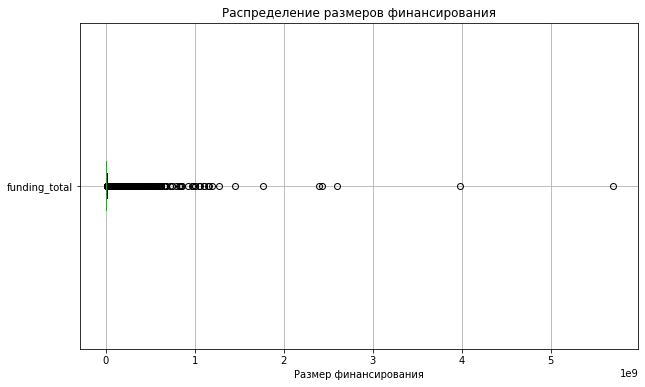

In [82]:
# Отразим распределение значений столбца funding_total на диаграмме размаха

plt.figure(figsize=(10, 6))


df_filtered_company.boxplot(column='funding_total', vert=False)

plt.title('Распределение размеров финансирования')
plt.xlabel('Размер финансирования')

plt.show()

In [83]:
upper_bound

14126625.0

In [84]:
lower_bound

-8475975.0

In [85]:
# Находим процентиль для верхней границы
upper_percentile = (df_filtered_company['funding_total'] <= upper_bound).mean()

# Находим процентиль для нижней границы
lower_percentile = (df_filtered_company['funding_total'] >= lower_bound).mean()
 

In [86]:
upper_percentile

0.8562348148329938

In [87]:
lower_percentile

1.0

Мы рассчитали верхнюю и нижнюю границу выбросов для столбца funding_total, они составили 14126625 и -8475975 соответственно. Расчёты показывают, что верхняя граница выбросов соответствует примерно 85-му процентилю, так как 85.62% значений в столбце funding_total находятся ниже этой границы. Нижняя граница выбросов, в свою очередь, соответствует 100-му процентилю или ниже минимального значения, так как все значения (100%) находятся выше этой границы.


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [98]:
# Сгруппируем данные таблицы company_info_df по категориям, а также расчитаем среднюю цены и стандартное отклонение:
company_info_df = company_info_df.loc[company_info_df['funding_total'] != 0]  # Исключение строк со значением 0

categories = company_info_df.groupby('category_code')['funding_total'].agg(['median', 'std'])
result_categories = categories.sort_values(by=['median', 'std'], ascending=False).head(20)
result_categories

,median,std
category_code,,
semiconductor,12850000.00,43537544.54
cleantech,9000000.00,98191088.20
nanotech,7500000.00,99650532.73
medical,6751000.00,34286656.48
biotech,6300000.00,58304827.01
network_hosting,6250000.00,72978462.22
security,5500000.00,51075573.46
public_relations,4505000.00,74507501.11
enterprise,4332500.00,41258308.62


<Figure size 720x432 with 0 Axes>

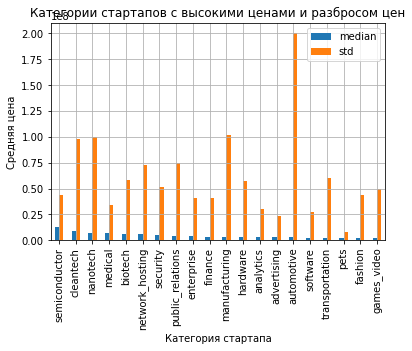

In [99]:
# На основе полученных данных построим столбчатую диаграмму:
plt.figure(figsize=(10, 6))

result_categories.plot(
               kind='bar', 
               rot=90, 
               legend=True,
               title=f'Категории стартапов с высокими ценами и разбросом цен')
plt.xlabel('Категория стартапа')
plt.ylabel('Средняя цена')
plt.grid()

plt.show() 

Мы вычислили 20 категорий стартапов с типично высокими ценами покупки стартапов и значительным разбросом. Такими оказались компании, осуществляющие свою деятельность в сферах: semiconductor, cleantech, nanotech, medical, biotech, network_hosting, security, public_relations, enterprise, finance, manufacturing, hardware, analytics, advertising, automotive, software, transportation, pets, fashion, games_video.  



### 3.5. Сколько раундов продержится стартап перед покупкой

Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца и построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

In [109]:
# Расчитаем типичное значение количества раундов для каждого возможного статуса стартапа:

company_info_df_2 = company_info_df.loc[(company_info_df['funding_rounds'] != -1) & (company_info_df['status'] != "нет данных") & (company_info_df['funding_rounds'] > 0)]

typical_values=company_info_df_2.groupby('status')['funding_rounds'].mean().sort_values(ascending=False)
typical_values

status
ipo         2.55
acquired    1.98
operating   1.72
closed      1.45
Name: funding_rounds, dtype: float64

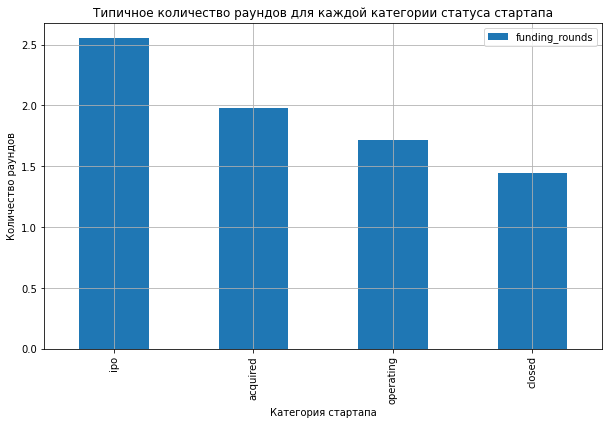

In [110]:
# На основе полученных данных построим столбчатую диаграмму:
plt.figure(figsize=(10, 6))

typical_values.plot(
               kind='bar', 
               rot=90, 
               legend=True,
               title=f'Типичное количество раундов для каждой категории статуса стартапа')
plt.xlabel('Категория стартапа')
plt.ylabel('Количество раундов')
plt.grid()

plt.show() 

Мы рассчитали типичное значение количества раундов для каждого возможного статуса стартапа. В итоге мы узнали, что для стартапов, имеющих статус "ipo" в среднем проходило 2.55 раундов финансирования, для "acquired" - 1.98, для "operating" - 1.72, а для "closed" - 1.45.


## Шаг 4. Итоговый вывод и рекомендации


Основной целью нашего исследования являлось проведение исслледовательского анализа исторических данных о финансировании стартапов для выявления показателей и признаков, которые указывают на повышенную вероятность успешной сделки по покупке компании. 

В результате проведенного исследования, мы узнали, что типичный размер собранных в рамках одного раунда финансирования средств был максимален в 2005 году и составлял 5 500 000. В 2013 году количество раундов финансирования было самым большим и составило 11072.

Также мы разделили все компании на несколько групп по количеству сотрудников - "1" (1 сотрудник), "2" (от 1 до 2 сотрудников), "3" (от 2 до 3 сотрудников), "4-5" (от 4 до 5 сотрудников), "6-10" (от 6 до 10 сотрудников), "11-25" (от 11 до 25 сотрудников), а также "26+" (компании, в которых более 26 сотрудников),  затем посчитали среднюю долю сотрудников без информации об образовании. В итоге мы узнали, что в компаниях, где работает всего один сотрудник, 100 % не имеют информации об образовании, в компаниях, где  более 26 сотрудников - 0.000493 %, в остальных группах компаний сотрудники, у которых нет информации об образовании, отсутсвуют. 

Также мы узнали, что распределение данных о размерах финансирования выглядит ассиметричным, а также характеризуется широким разбросом и «хвостом»  в правой части гистограммы. Такие высокие значения можно отнести к выбросам. Однако большинство максимальных значений могут не быть ошибочными, так как возможно связаны с высокой ценой продаваемых компаний. Рассчитали верхнюю и нижнюю границу выбросов данных о размерах финансирования, они составили 14126625 и -8475975 соответственно. Расчёты показывают, что верхняя граница выбросов соответствует примерно 85-му процентилю, так как 85.62% значений в столбце funding_total находятся ниже этой границы. Нижняя граница выбросов, в свою очередь, соответствует 100-му процентилю или ниже минимального значения, так как все значения (100%) находятся выше этой границы.

Мы вычислили 20 категорий стартапов с типично высокими ценами покупки стартапов и значительным разбросом. Такими оказались компании, осуществляющие свою деятельность в сферах: semiconductor, cleantech, nanotech, medical, biotech, network_hosting, security, public_relations, enterprise, finance, manufacturing, hardware, analytics, advertising, automotive, software, transportation, pets, fashion, games_video.   

Помимо этого, мы рассчитали типичное значение количества раундов для каждого возможного статуса стартапа. В итоге мы узнали, что для стартапов, имеющих статус "ipo" в среднем проходило 2.55 раундов финансирования, для "acquired" - 1.98, для "operating" - 1.72, а для "closed" - 1.45.


Основываясь на проведённом иследовании, можно сказать, что данные подкрепляют друг друга, ведь количество сотрудников в стартапах действительно может варьироваться от 1 сотрудника до гораздо большего количества. Широкий разброс в размеразх финансирования также может быть вполне обоснованным, так как цены на различные компании из различных сфер деятельности могут быть довольно разными. Для рассмотрения в качестве покупки можно рекомендовать  стартапы из таких сфер, как:  nanotech, cleantech, semiconductor, biotech, automotive, medical, manufacturing, messaging, analytics, security, government, fashion, finance, network_hosting и hardware, так как у них самые высокие цены, что может говорить о потенциальной ликвидности в будующем, в тоже время у таких компаний значительный разброс в ценах, в связи с чем есть возможность приобрести такую компанию по более низкой цене относительно остальных. 